In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv("/Users/leonardoroman/Desktop/data_science_projects/loan_prediction_prob/train.csv")
df2 = pd.read_csv("/Users/leonardoroman/Desktop/data_science_projects/loan_prediction_prob/train.csv")

In [4]:

# STEP 1 DATA EXPLORATION
# DATA WRANGLING.

#print(df)
df2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


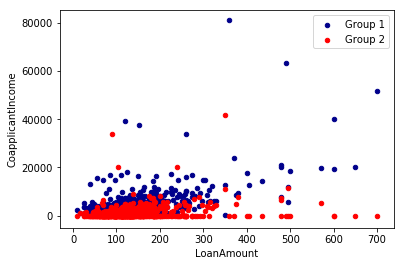

In [7]:
# FINDING RELATIONSHIP BETWEEN TWO VARIABLES

ai = df.plot.scatter(x='LoanAmount', y='ApplicantIncome', color='DarkBlue', label='Group 1')
df.plot.scatter(x='LoanAmount', y='CoapplicantIncome', color='Red', label='Group 2', ax = ai)


In [15]:
# FINDING MISSING VALUES IN THE DATASET.

df.apply(lambda x:sum(x.isnull()),axis = 0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# GETTING VALUE COUNTS.

df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [43]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [41]:
#df['LoanAmount'].value_counts()

In [13]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [23]:
# FILLING MISSING VALUES

# Male/Female ratio 4:1
df['Gender'].fillna('Male',inplace = True, limit = 11)
df['Gender'].fillna('Female', inplace = True)

In [24]:
# Married/notMarried ratio 2:1 
df['Married'].fillna('Yes',inplace = True, limit = 2)
df['Married'].fillna('No',inplace = True)

In [25]:
# Dependents as ratio (6:2:2:1)
df['Dependents'].fillna('0', inplace = True, limit = 9)
df['Dependents'].fillna('1', inplace = True, limit = 3)
df['Dependents'].fillna('2', inplace = True, limit = 2)
df['Dependents'].fillna('3+',inplace = True)

In [26]:
# Self_Employed as ratio 4:1
df['Self_Employed'].fillna('No', inplace = True, limit = 27)
df['Self_Employed'].fillna('Yes', inplace = True)

In [27]:
# LoanAmount as average.
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [28]:
# Loan_Amount_Term as average.
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)

In [29]:
# Credit_History as ratio 5:1
df['Credit_History'].fillna('1.0',inplace = True, limit = 42)
df['Credit_History'].fillna('0.0',inplace = True)

In [34]:
df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [20]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:')
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Probability of getting loan by credit history')

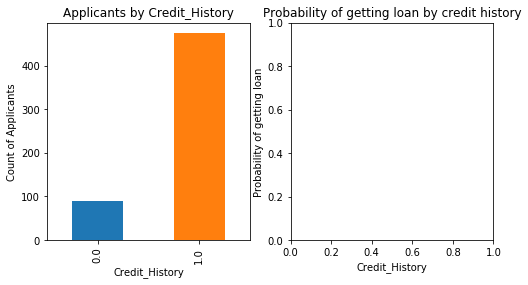

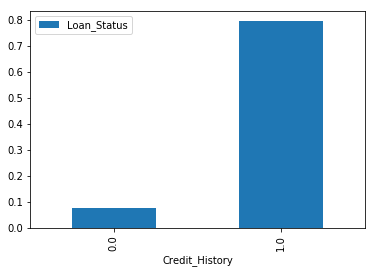

In [32]:

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

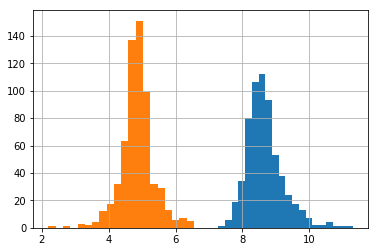

In [33]:
# Transforming and binning values: Transforming variables can also eliminate outliers.
# Natural log of a value reduces the variation caused by extreme values.

df['LoanAmount_log'] = np.log(df['LoanAmount']) # To take care of stream values
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)
df['LoanAmount_log'].hist(bins=20) 

In [ ]:

# STEP 2 BUILDING PREDICTIVE MODEL

# Since, sklearn requires all inputs to be numeric, we should convert all our categorical 
# variables into numeric by encoding the categories


In [35]:
# TRANSFORMIN VARIABLES INTO NUMERIC VALUES BY ENCODING

from sklearn.preprocessing import LabelEncoder


var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [36]:
# Import the required modules. Then define a generic classification function, 
# which takes a model as input and determines the Accuracy and Cross-Validation scores.

from sklearn.linear_model import LogisticRegression
#For K-fold cross validation
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [37]:
# Generic function for making a classification model and accessing performance:
# model = regression model
# data = entire dataset "df"
# predictors = defined by coder what needs to be predicted by: i.e. by "Credit_History".
# outcome = defined by coder to compare with: i.e. with " Loan_Status "

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [38]:
# let’s make our first model with ‘Credit_History’.
# Using Regression Model

model = LogisticRegression()

# variables_for_prediction
predictor_var = ['Credit_History','TotalIncome_log','LoanAmount_log',
                 'Property_Area','Dependents']

# variable_of_interest
outcome_var = ['Loan_Status']

# Method format: fun_name(ml_model, dataframe, variables_for_prediction, variable_of_interest)
classification_model(model, df,predictor_var,outcome_var)


Accuracy : 80.619%
Cross-Validation Score : 80.618%


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
# Model using decisionTree classifier
# Overfitting case as validation went down and accuracy went up

model2 = DecisionTreeClassifier()

predictor_var = ['Credit_History','TotalIncome_log','LoanAmount_log',
                 'Property_Area','Dependents']
classification_model(model2, df,predictor_var,outcome_var)


Accuracy : 100.000%
Cross-Validation Score : 67.749%


In [40]:
# decisionTree different combination of variables:
# 93.16% accurate and 69.055% validated
# predictor_var = ['Credit_History','Gender','Married','Education','LoanAmount_log']

# 95.765% accurate and 68.89% validated
predictor_var = ['Credit_History','TotalIncome_log','LoanAmount_log',
                 'Property_Area','Dependents']
classification_model(model2, df,predictor_var,outcome_var)

# Here we observed that although the accuracy went up on adding variables, 
# the cross-validation error went down. This is the result of model over-fitting the data.

Accuracy : 100.000%
Cross-Validation Score : 67.749%


In [45]:
# Another algorithm for solving the classification problem. 
# Random forest

model3 = RandomForestClassifier(n_estimators=100)
predictor_var = ['Credit_History','TotalIncome_log','LoanAmount_log',
                 'Property_Area','Dependents']
classification_model(model3, df,predictor_var,outcome_var)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Accuracy : 100.000%


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed whe

Cross-Validation Score : 77.850%


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [43]:
model4 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Credit_History','TotalIncome_log','LoanAmount_log',
                 'Property_Area','Dependents']
classification_model(model4, df,predictor_var,outcome_var)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A co

Accuracy : 82.573%
Cross-Validation Score : 79.315%


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [46]:
#Create a series with feature importances:
featimp = pd.Series(model4.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History     0.539865
TotalIncome_log    0.198318
LoanAmount_log     0.172153
Property_Area      0.053260
Dependents         0.036404
dtype: float64
